In [45]:
import os
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plot
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

# Lectura de datos

In [46]:
#Directorio
data = r'/Users/aleja/Downloads/Data' # Directorio de la carpeta donde se alojan los archivos

In [47]:
#Lectura del dataset (Archivo csv de caracterización)
df = pd.read_csv(os.path.join(data,'features_30_sec.csv'))

#El archivo 00054 de jazz no funciona, se procede a imputar
df = df.drop(df.loc[df['filename']== 'jazz.00054.wav'].index)
df = df.drop(['filename', 'length'], axis=1)
df.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


# Preprocesamiento 

In [48]:
df_pop = df[700:799]
df_metal = df[600:699]
df_disco = df[301:400]
df_blues = df[0:100]
df_reggae = df[800:899]
df_classical = df[101:200]
df_rock= df[900:999]
df_hiphop = df[401:500]
df_country = df[201:300]
df_jazz = df[501:599]

df = pd.concat([df_pop, df_metal, df_disco, df_blues, df_reggae, df_classical, df_rock, df_hiphop, df_country, df_jazz])
df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
701,0.412993,0.097699,0.262579,0.014924,3702.105111,1.404155e+06,3431.856264,179373.095619,8072.977711,2.673778e+06,...,129.778473,5.566532,205.448044,3.822952,170.974274,5.576165,166.527878,4.927082,155.335678,pop
702,0.417771,0.093556,0.215172,0.006579,3214.086840,1.006318e+06,3269.678966,107054.369743,7424.433605,2.453182e+06,...,94.625061,1.415107,72.024689,2.811311,58.061012,-1.410339,44.048363,-3.386550,46.421040,pop
703,0.409812,0.081134,0.129422,0.001808,1836.956691,7.874765e+05,2066.669705,408916.095988,3670.803274,3.150664e+06,...,68.658119,4.753404,77.756416,-3.510077,71.796509,4.904540,61.578075,-3.211654,61.053921,pop
704,0.384296,0.083575,0.211175,0.002561,2753.120791,7.178949e+05,2861.501507,149359.339153,5986.680118,2.701613e+06,...,47.624577,-1.329443,36.215866,-0.874240,43.780357,0.691995,53.095066,-1.774849,48.859238,pop
705,0.323219,0.086779,0.139690,0.005985,2289.850782,5.502490e+05,2436.032088,197987.300177,4747.105376,2.637661e+06,...,41.978836,-3.306214,47.457024,-5.429773,47.201260,-0.566918,45.026176,-2.169354,45.466721,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.311235,0.090341,0.068182,0.000695,1854.556905,2.145244e+05,2215.592498,126407.713980,4282.076453,1.763819e+06,...,92.108276,-5.153530,75.903023,3.057607,89.085808,2.093325,91.776138,0.951933,97.158752,jazz
596,0.298770,0.093177,0.044420,0.000463,1873.833302,5.148038e+05,2083.706520,178343.209879,4008.631419,2.667886e+06,...,166.871582,1.778867,101.444366,-2.124144,47.913990,-5.369799,141.946411,-5.330001,129.295364,jazz
597,0.224049,0.091032,0.021187,0.000184,1176.181446,2.459312e+05,1753.640845,186895.362068,2343.555254,2.332215e+06,...,170.751541,7.966308,171.086014,5.073698,136.068344,1.616789,110.436943,-4.366201,103.683487,jazz
598,0.327593,0.091018,0.060162,0.000455,1885.601099,2.999070e+05,2230.789208,106215.474174,4357.067956,1.694619e+06,...,36.059933,-6.207161,33.550941,0.873401,40.771870,-3.393118,57.267189,-0.377289,62.587696,jazz


# Datos de prueba y de entrenamiento

In [49]:
#Variables de entrenamiento
X = df.drop(['label'], axis=1)
y = df['label']
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=3)
#X_train: datos de entrenamiento
#X_test: datos de prueba
#y_train: labels de entrenamiento (estos son las etiquetas de generos)
#y_test: labels de prueba (estos son las etiquetas de generos)

X_train = pd.concat([X[27:99], #pop
                    X[115:198], #METAL
                    X[218:297], #DISCO
                    X[321:397], #BLUES
                    X[416:496], #REGGAE
                    X[520:595], #CLASICA
                    X[617:694], #ROCK
                    X[718:793], #HIPHOP
                    X[813:892], #COUNTRY
                    X[913:995]])

X_test = pd.concat([X[0:26], #pop
                    X[99:114], #metal
                    X[199:217], #disco
                    X[298:320], #BLUES
                    X[398:415], #REGGAE
                    X[497:520], #CLASICA
                    X[596:616], #ROCK
                    X[695:717], #HIPHOP
                    X[794:812], #COUNTRY
                    X[893:912]])

y_train = pd.concat([y[27:99], #pop
                    y[115:198], #METAL
                    y[218:297], #DISCO
                    y[321:397], #BLUES
                    y[416:496], #REGGAE
                    y[520:595], #CLASICA
                    y[617:694], #ROCK
                    y[718:793], #HIPHOP
                    y[813:892], #COUNTRY
                    y[913:995]])

y_test = pd.concat([y[0:26], #pop
                    y[99:114], #metal
                    y[199:217], #disco
                    y[298:320], #BLUES
                    y[398:415], #REGGAE
                    y[497:520], #CLASICA
                    y[596:616], #ROCK
                    y[695:717], #HIPHOP
                    y[794:812], #COUNTRY
                    y[893:912]])

#Escalar el dataset (prepocesamiento)
scaler = StandardScaler()

print(scaler.fit(X_train))
x_train_scaler=scaler.transform(X_train)

print(scaler.fit(X_test))
x_test_scaler=scaler.transform(X_test)

StandardScaler()
StandardScaler()


In [50]:
df_train = pd.concat([y_train, X_train], axis=1) #dataframe de entrenamiento
df_test = pd.concat([y_test, X_test], axis=1) #dataframe de entrenamiento

In [51]:
#Transformación de una variable categórica a numérica
labels_train = preprocessing.OneHotEncoder().fit_transform(pd.DataFrame(df_train['label'])).toarray()
df_train[['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']]= labels_train
df_train = df_train.drop('label', axis=1) #Ya la separramos en varias columnas, así que no ahora ya no la necesitamos

labels_test = preprocessing.OneHotEncoder().fit_transform(pd.DataFrame(df_test['label'])).toarray()
df_test[['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']]= labels_test
df_test = df_test.drop('label', axis=1) #Ya la separramos en varias columnas, así que no ahora ya no la necesitamos


In [52]:
clases = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
x = list(reversed(clases))
y_train_g = df_train.groupby(clases)['chroma_stft_mean'].count().tolist()
y_test_g = df_test.groupby(clases)['chroma_stft_mean'].count().tolist()


In [53]:
df = pd.DataFrame()
df['GENDER'] = x
df['TRAIN'] = y_train_g
df['TEST'] = y_test_g

df

,GENDER,TRAIN,TEST
0,rock,77,20
1,reggae,80,17
2,pop,72,26
3,metal,83,15
4,jazz,77,19
5,hiphop,75,22
6,disco,79,18
7,country,79,18
8,classical,75,23
9,blues,76,22


## SVV

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
  
#Definir los hiperparámetros
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf','linear','poly','sigmoid']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#Entrenar el modelo
grid.fit(x_train_scaler, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.103 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.110 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.110 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.110 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.613 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.665 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.710 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.688 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.604 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.600 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             verbose=3)

In [55]:
#Mejores hiperparámetros
print('Los mejores hiperparámtetros son:',grid.best_params_)

Los mejores hiperparámtetros son: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [60]:
#Entrenar el modelo con los mejores hiperparametros
model_scv = SVC(C=100, kernel='rbf', gamma=0.01)
model_scv.fit(x_train_scaler, y_train)

#Metrica
y_true_svc = y_test 
y_pred_svc = model_scv.predict(x_test_scaler)
print('Precisión modelo svm: %.2f'%accuracy_score(y_true_svc, y_pred_svc)) 

Precisión modelo svm: 0.54


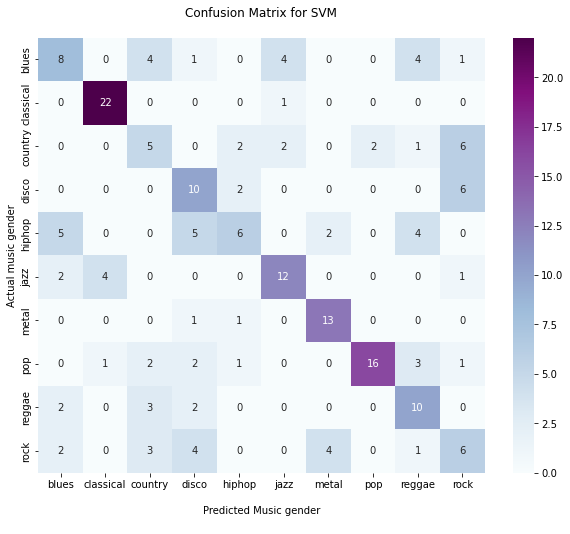

In [61]:
#para svm
from sklearn.metrics import confusion_matrix
cf_matrix= confusion_matrix(y_true_svc, y_pred_svc)

plt.figure(figsize = (10,8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='BuPu')



ax.set_title('Confusion Matrix for SVM\n');
ax.set_xlabel('\nPredicted Music gender\n')
ax.set_ylabel('Actual music gender');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])
ax.yaxis.set_ticklabels(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock'])

## Display the visualization of the Confusion Matrix.
plt.show()